<div align="right">
  <img src="https://drive.google.com/uc?export=view&id=1J8JpP65HsHXdpJvhb_sMwn3yROyU832m" height="80" width="200" style="float: right;">
</div>
<h1><b>Data Science and Machine Learning</b></h1>
<h2><b>Clase 26</b>: Series de tiempo</h2>
<h3><b>Docente</b>: <a href="https://www.linkedin.com/in/danielablanco/">Daniela Blanco</a>

# Contenido

- [1. ¿Series de tiempo?](#series)
- [2. Conceptos básicos de series de tiempo](#conceptos)
  - [2.1. Tendencia](#tendencia)
  - [2.2. Estacionalidad](#estacionalidad)
  - [2.3. Variabilidad](#variabilidad)
  - [2.4. Puntos atípicos (Outliers)](#outliers)
  - [2.5. Autocorrelación](#autocorrelación)
  - [2.6. Puntos de inflexión](#infexion)
- [3. Modelos](#modelos)
  - [3.1. ARIMA](#arima)
  - [3.2. Suavizado exponencial](#suavizado)
  - [3.3. Redes neuronales recurrentes](#rnn)
- [4. Ejemplo de uso](#ejemplo)
- [5. Links de interés](#links)


In [1]:
!pip install numpy==1.23.5 scipy cython
!pip install pmdarima

In [25]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

import warnings

In [3]:
warnings.filterwarnings("ignore")

## 1. ¿Series de tiempo? <a name="series"></a>


<img src="https://drive.google.com/uc?export=view&id=1WrZYkQaggrRwLY2ejIGfoq0Pqm70j-_N" height="143" width="418" style="float: center;">

Una serie de tiempo es una **secuencia de datos ordenados en el tiempo**, donde cada punto de datos está asociado a un instante específico.

En otras palabras, es una colección de observaciones que se registran en intervalos a lo largo del tiempo.

El tiempo es la variable independiente, y las observaciones registradas a lo largo del tiempo son las variables dependientes.

El objetivo principal de analizar una serie temporal es **comprender y modelar el patrón subyacente en los datos a lo largo del tiempo**, con el fin de hacer predicciones futuras (la próxima foto) o extraer información relevante.

Las series temporales se encuentran comúnmente en una amplia variedad de campos: economía, finanzas, meteorología, ciencia e ingeniería, entre otras.

Algunos ejemplos de series temporales incluyen datos de ventas diarias, precios de acciones, temperaturas diarias, tasas de crecimiento de población, niveles de producción, etcétera.

Es importante tener en cuenta que los **datos están correlacionados en el tiempo**. Esto significa que las observaciones en un momento dado pueden depender de las observaciones pasadas y, en algunos casos, también pueden verse afectadas por las observaciones futuras.

Este patrón de correlación en el tiempo es lo que hace que el análisis de series temporales sea único y **requiera técnicas específicas para su modelado y predicción**.

## 2. Conceptos básicos de series de tiempo <a name="conceptos"></a>

Cuando analizamos visualmente una serie temporal, hay varias cosas importantes que debemos buscar para comprender el comportamiento y los patrones de los datos a lo largo del tiempo.

Al identificar estas características podemos obtener información valiosa sobre el comportamiento y las relaciones temporales de los datos.

### 2.1.Tendencia <a name="tendencia"></a>

Se denomina tendencia de una serie temporal a su comportamiento o movimiento a largo plazo.

Una tendencia puede ser lineal (crecimiento o decrecimiento constante) o no lineal (crecimiento o decrecimiento acelerado o desacelerado).

**Tendencia Ascendente**: Indica un aumento sostenido en los valores de la serie de tiempo.

**Tendencia Descendente**: Indica una disminución sostenida en los valores.

**Tendencia Constante**: Indica que los valores de la serie permanecen relativamente estables a lo largo del tiempo.

### 2.2. Estacionalidad <a name="estacionalidad"></a>

Patrones que se repiten a intervalos regulares de tiempo (diariamente, mensualmente, etc.).

Por ejemplo ventas altas en temporada navideña.

Se puede también hablar de ciclos como fluctuaciones que ocurren en un período más largo qeu la estacionalidad (como un ciclo económico).



### 2.3. Variabilidad<a name="variabilidad"></a>

Indica como cambian los datos en el tiempo.

La variabilidad puede indicar momentos de inestabilidad o cambios en el comportamiento del fenómeno estudiado.

### 2.4. Puntos atípicos (Outliers) <a name="outliers"></a>

Valores extremos o inusuales que difieran significativamente del patrón general de la serie.

Los puntos atípicos pueden afectar la interpretación y los análisis posteriores.

Se usan técnicas especiales para tratarlos como el suavizado.

### 2.5. Autocorrelación <a name="autocorrelación"></a>

Es una medida de la correlación entre los valores de una serie de tiempo y los valores de esa misma serie en diferentes puntos en el tiempo.

Nos permite comparar distintas "fotos" o períodos de la serie de tiempo.

Es útil para identificar patrones repetitivos o estacionales en los datos.

**Autocorrelación Positiva**: Indica que valores altos en la serie de tiempo tienden a ser seguidos por valores altos y valores bajos tienden a ser seguidos por valores bajos.

**Autocorrelación Negativa**: Indica que valores altos tienden a ser seguidos por valores bajos y viceversa.

**Sin Autocorrelación**: Indica que no hay un patrón discernible en la serie de tiempo.

### 2.6. Puntos de inflexión <a name="infexion"></a>

Cambios bruscos o puntos de inflexión en la serie, donde la tendencia o el comportamiento del fenómeno cambian significativamente.

## 3. Modelos <a name="modelos"></a>

Para predecir series temporales (time series forecasting), existen varios tipos de modelos que se pueden utilizar.

Cada uno tiene sus ventajas y limitaciones, y la elección del modelo dependerá del tipo de datos y del patrón temporal que se quiera modelar. Es importante considerar la naturaleza de los datos y realizar una evaluación cuidadosa del rendimiento del modelo para tomar la decisión más adecuada.

### 3.1. ARIMA (AutoRegressive Integrated Moving Average) <a name="arima"></a>



El modelo ARIMA (Autoregressive Integrated Moving Average) es uno de los modelos más utilizados para el análisis y la predicción de series de tiempo.

ARIMA combina tres componentes principales: autoregresión (AR), integración (I) y media móvil (MA).

ARIMA es versátil y puede adaptarse a diferentes patrones en las series temporales, como tendencias y estacionalidad.

Cuando aplicamos ARIMA a una serie temporal, primero podemos diferenciar la serie si es necesario para hacerla estacionaria.

Luego, ajustamos el modelo ARIMA a los datos y utilizamos sus componentes AR, I y MA para hacer pronósticos futuros.

### Componentes

- Autoregresión (AR): indica que los valores actuales de la serie de tiempo están relacionados con sus valores pasados.
- Integración (I): número de diferencias necesarias para hacer que la serie de tiempo sea estacionaria (una serie de tiempo estacionaria tiene propiedades estadísticas constantes a lo largo del tiempo).
- Media Móvil (MA): modela la relación entre el valor actual de la serie de tiempo y los errores pasados (ruido blanco).

El modelo ARIMA se denota como ARIMA(p,d,q), donde:

p es el orden del componente autoregresivo (AR).

d es el orden de diferenciación (I).

q es el orden del componente de media móvil (MA).

### 3.2. Suavizado exponencial (Exponential Smoothing) <a name="suavizado"></a>

Este modelo es muy simple y eficiente. Se basa en la idea de asignar diferentes pesos a las observaciones pasadas, dándoles más importancia cuanto más recientes son. Es útil para series temporales con tendencias o patrones de crecimiento/declive gradual.

### 3.3. Redes neuronales recurrentes y LSTM <a name="rnn"></a>

Estos modelos son técnicas de aprendizaje profundo (deep learning) que pueden manejar secuencias de datos, como las series temporales.

Las RNN y LSTM son especialmente adecuadas para patrones de comportamiento complejos y relaciones a largo plazo en los datos.

Son modelos poderosos y versátiles, pero también pueden ser más complicados de entrenar y ajustar.

## 4. Ejemplo de uso <a name="ejemplo"></a>



Utilizaremos un famoso conjunto de datos sobre la evolución del número de pasajeros en una famosa aerolínea americana desde 1949 a 1960.

In [4]:
total_data = sns.load_dataset("flights")
total_data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


En esta ocasión, necesitamos aplicar una transformación del mismo para generar una serie temporal con dos dimensiones: la temporal y la del dato que queremos analizar y predecir.

La dimensión temporal estará compuesta por el mes (month) y el año (year) y el dato que observaremos a lo largo del tiempo será el número de pasajeros (passengers).

In [5]:
total_data["month"] = pd.to_datetime(total_data.month, format = "%b").dt.month
total_data["date"] = pd.to_datetime(total_data[["year", "month"]].assign(day = 1))

total_data.head()

,year,month,passengers,date
0,1949,1,112,1949-01-01
1,1949,2,118,1949-02-01
2,1949,3,132,1949-03-01
3,1949,4,129,1949-04-01
4,1949,5,121,1949-05-01


In [6]:
total_data = total_data.set_index("date")

total_data.head()

,year,month,passengers
date,,,
1949-01-01,1949,1,112
1949-02-01,1949,2,118
1949-03-01,1949,3,132
1949-04-01,1949,4,129
1949-05-01,1949,5,121


In [7]:
ts = total_data["passengers"]
ts.head()

,passengers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


A continuación visualizaremos la serie temporal para llevar a cabo un análisis visual de la misma:

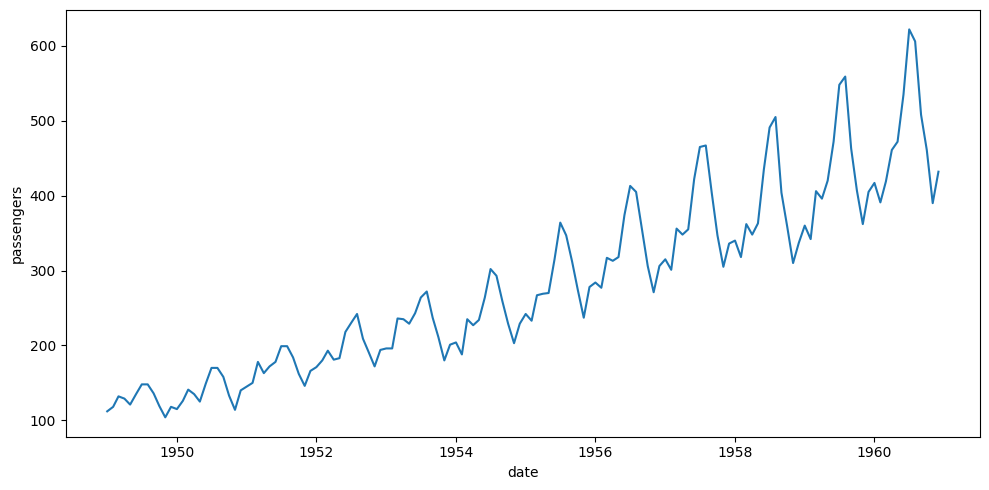

In [8]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)

plt.tight_layout()

plt.show()

#### ¿Visualmente?

Tendencia: ascendente.

Estacionalidad: aparece un pico al final de los años.

Variabilidad: cambios bruscos.

### Análisis de una serie temporal

Para la labor de realizar predicciones sobre series temporales y analizarlas, nos apoyaremos en la librería `statsmodels`.

La **descomposición** de una serie temporal es un proceso estadístico que separa de una serie de tiempo en varios elementos diferenciados.

Cada uno de estos componentes representa una parte de la estructura subyacente de la serie temporal.

Utilizamos la función `seasonal_decompose` de la biblioteca statsmodels para descomponer la serie de tiempo en sus componentes de tendencia, estacionalidad y residuos.

In [9]:
decomposition = seasonal_decompose(ts, period = 12)
decomposition

#### Análisis de la tendencia

Para acceder a su información recurrimos al componente `trend` del resultado `decomposition`.

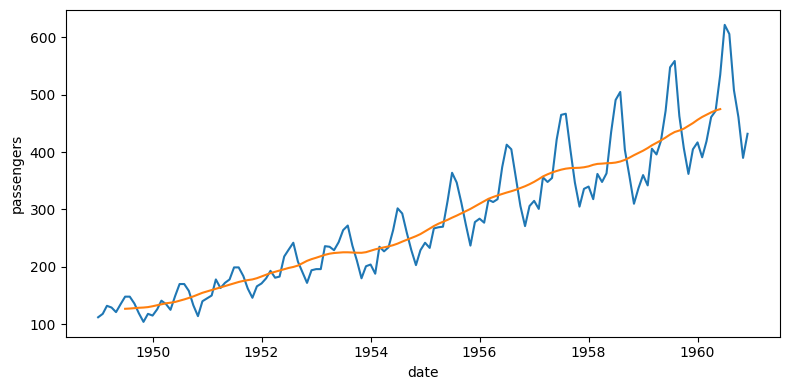

In [10]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (8, 4))

sns.lineplot(data = ts)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

Se confirma lo observado: una clara tendencia positiva a lo largo de los años.

Hay un aumento general en el número de pasajeros a lo largo del tiempo.

#### Análisis de la estacionalidad

Para acceder a su información recurrimos al componente `seasonal` del resultado `decomposition`.

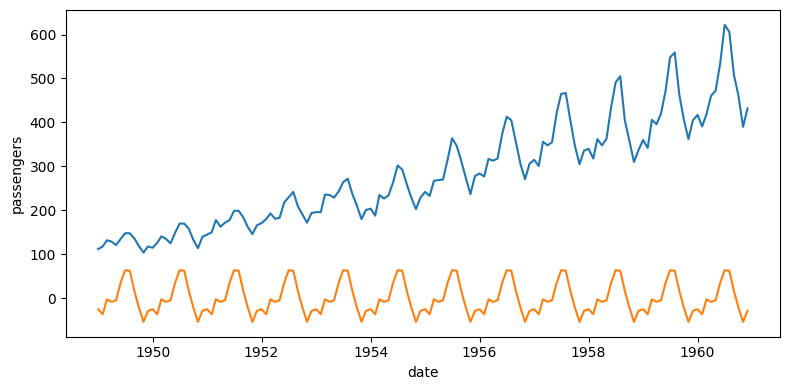

In [11]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (8, 4))

sns.lineplot(data = ts) # Representa el número de pasajeros por mes
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

La componente estacional muestra patrones repetitivos que ocurren en intervalos fijos (mensualmente, en este caso, ya que period=12 representa un ciclo anual).

Si la curva de estacionalidad tiene oscilaciones regulares con una periodicidad constante, indica que la serie tiene una fuerte estacionalidad. Por ejemplo, si hay picos en ciertos meses (e.g., verano) y caídas en otros (e.g., invierno), esto señala un comportamiento estacional.

Vemos gráficas prácticamente iguales por períodos, ¿hay estacionalidad?

Los picos suelen ocurrir en los mismos meses cada año, lo que puede estar relacionado con temporadas vacacionales.

Para evaluar la estacionalidad de la serie temporal podemos aplicar la llamada **Prueba de Dickey-Fuller** (*Dickey-Fuller test*), que es un contraste de hipótesis en el que la hipótesis nula es que la serie es estacionaria, y la alternativa, que es no estacionaria:

In [12]:
def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

In [13]:
test_stationarity(ts)

Resultados de la prueba de Dickey-Fuller:


,0
Test Statistic,0.815369
p-value,0.991880
#Lags Used,13.000000
Number of Observations Used,130.000000
Critical Value (1%),-3.481682
Critical Value (5%),-2.884042
Critical Value (10%),-2.578770


Aquí podemos ver que el `p-value` es mayor a 0.05, esto significa que nuestra hipótesis nula será rechazada y tomaremos esta serie como no estacionaria.

**Nota**

La aparente discrepancia entre la visualización de la estacionalidad a través de la descomposición de la serie de tiempo y los resultados del test de Dickey-Fuller puede deberse a varios factores.

1. Confusión entre Estacionariedad y Estacionalidad:

  *Estacionariedad*: Se refiere a que las propiedades estadísticas de la serie no cambian con el tiempo. Una serie estacionaria tiene una media y una varianza constantes.

  *Estacionalidad*: Se refiere a patrones repetitivos en intervalos regulares (por ejemplo, estacionalidad anual).

  El test de *Dickey-Fuller* evalúa la estacionariedad, no la estacionalidad. Por lo tanto, un p-valor alto en el test de Dickey-Fuller indica que la serie no es estacionaria, pero esto no contradice la presencia de estacionalidad identificada por la descomposición.

2. *Presencia de Tendencia:*

  Si la serie tiene una tendencia clara, el test de Dickey-Fuller puede indicar no estacionariedad debido a esta tendencia, incluso si la serie también tiene componentes estacionales.

3. *Número de Diferencias Insuficientes:*

  La serie de tiempo puede necesitar más diferenciaciones para convertirse en estacionaria. La descomposición puede separar la estacionalidad y la tendencia, pero el ADF test puede requerir diferencias adicionales para eliminar completamente estas tendencias.

### ¿Cómo la mejoramos?

Para poder realizar predicciones precisas con modelos de series de tiempo, a menudo es necesario transformar la serie de tiempo para hacerla estacionaria. Esto se puede lograr mediante técnicas como la diferenciación.

**Diferenciación** es el proceso de restar el valor actual de una serie temporal de su valor anterior, o de un valor retrasado.

Por ejemplo, si tiene una serie temporal mensual de ventas, puede diferenciarla restando las ventas del mes anterior del mes actual. Esto le da el cambio en las ventas de mes a mes, que es una nueva serie de tiempo.

Puede repetir este proceso para obtener diferencias de orden más altas, como el cambio en el cambio en las ventas, etc. La idea es eliminar cualquier tendencia o estacionalidad que haga que la serie temporal original no sea estacionaria.

In [14]:
# miramos con "otra lupa"
# Diferenciar la serie para remover tendencia
flights_dif = sns.load_dataset("flights")

flights_dif["month"] = pd.to_datetime(flights_dif.month, format = "%b").dt.month
flights_dif["date"] = pd.to_datetime(flights_dif[["year", "month"]].assign(day = 1))

flights_dif = flights_dif.set_index("date")

# Diferenciar la serie para remover tendencia
flights_dif['diff_passengers'] = flights_dif['passengers'].diff().dropna()

ts_flights_dif = flights_dif["diff_passengers"]
ts_flights_dif.dropna(inplace = True)

ts_flights_dif

,diff_passengers
date,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


In [15]:
# Test de Dickey-Fuller en la serie diferenciada
test_stationarity(ts_flights_dif)

Resultados de la prueba de Dickey-Fuller:


,0
Test Statistic,-2.829267
p-value,0.054213
#Lags Used,12.000000
Number of Observations Used,130.000000
Critical Value (1%),-3.481682
Critical Value (5%),-2.884042
Critical Value (10%),-2.578770


Como p-valor es (casi*) < 0.05 podemos tomarla como estacionaria.

(* o volver a diferenciar otra vez...)

#### Análisis de la variabilidad

La variabilidad implica el estudio de los residuos. Muestra cómo fluctúan los datos una vez se ha estudiado la tendencia y la estacionalidad.

Los residuos deberían parecerse a ruido aleatorio si la descomposición fue exitosa. Esto significa que no deben tener:
 - Tendencias visibles (crecientes o decrecientes).
 - Patrones periódicos (picos y valles regulares).
 - Correlaciones entre puntos cercanos en el tiempo.

Es decir los residuos deberían parecerse a ruido aleatorio si el modelo captura bien tanto la tendencia como la estacionalidad.

Para acceder a su información recurrimos al componente `resid` del resultado `decomposition`.

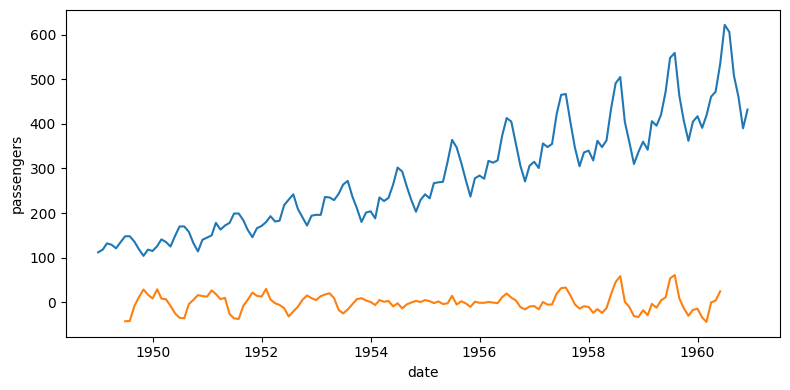

In [17]:
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (8, 4))

sns.lineplot(data = ts)
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()

Patrones grandes o regulares:
- Si los residuos muestran fluctuaciones grandes en ciertos periodos o patrones repetitivos, podría haber un componente estacional no detectado o una tendencia no lineal.

  Ejemplo: Si los residuos tienen picos recurrentes en los mismos meses, es posible que el periodo especificado (period=12) no sea correcto o que existan múltiples componentes estacionales.

Residuos dispersos alrededor de cero:

- Si los residuos están uniformemente dispersos alrededor de cero, sin un patrón claro, esto es un buen indicador de que la descomposición fue adecuada.

Se confirma en parte lo observado, ya que la carga de residuos se hace más notable al inicio y al final del periodo estudiado.

#### Funciones de autocorrelación

Para visualizar la autocorrelación de la serie vamos a utilizar las funciones de autocorrelación (ACF) y autocorrelación parcial (PACF).

Este gráfico nos ayuda a ver si los valores en la serie de tiempo están correlacionados con los valores anteriores.

### Función de autocorrelación (ACF)

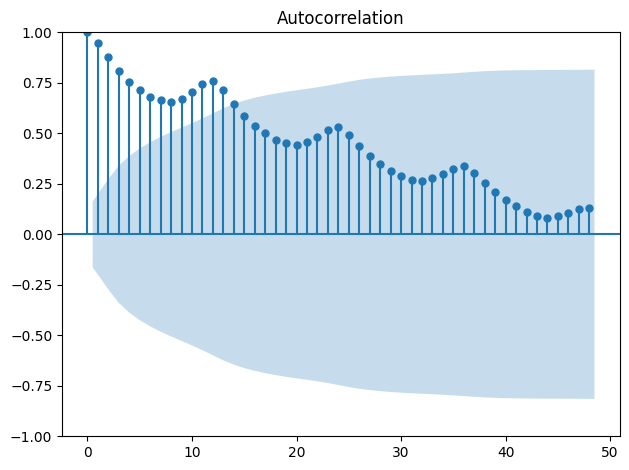

In [18]:
# cada lag es un mes
plot_acf(ts, lags=48)

plt.tight_layout()

plt.show()

Se aprecia una alta correlación entre los puntos y sus copias retrasadas, que disminuye a lo largo del tiempo.

Eje Horizontal (X): Representa los rezagos (lags). Cada punto en el eje X indica un rezago específico. Por ejemplo, el valor en lag=1 muestra la autocorrelación entre el valor de la serie en el tiempo $𝑡$ y el valor en $t-1$.

Eje Vertical (Y): Representa el coeficiente de autocorrelación. Este valor varía entre -1 y 1. Un valor positivo indica una relación directa (cuando uno sube, el otro también sube), mientras que un valor negativo indica una relación inversa (cuando uno sube, el otro baja).

Barras de Autocorrelación: Cada barra en el gráfico muestra la autocorrelación en un rezago específico. La altura de la barra indica la magnitud de la autocorrelación. Barras más altas indican una correlación más fuerte.

Líneas de Confianza: Si una barra excede estas líneas hay una correlación estadísticamente significativa en ese rezago.

- Lag 1-12: Barras altas, lo que indica una fuerte autocorrelación mensual (sugerencia de estacionalidad anual).

- Lag 12: Un pico significativo, indicando que los datos de un año están fuertemente correlacionados con los datos del año anterior.

- La ACF disminuye lentamente y muestra picos significativos en los rezagos correspondientes a múltiplos de 12 (12, 24, 36, 48), lo que confirma la fuerte estacionalidad anual.

### Función de Autocorrelación Parcial (PACF)

Mide la relación entre $Y_t$ y $Y_{t-k}$ eliminando la influencia de los valores intermedios.

Es decir ayuda a identificar la influencia directa de los valores pasados sin la interferencia de otros valores intermedios.

No tiene una expresión simple, pero se calcula resolviendo un sistema de ecuaciones de regresión autorregresiva

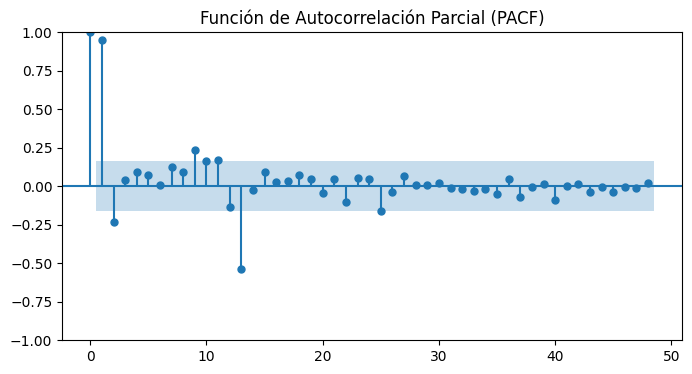

In [22]:
# Graficar PACF
plt.figure(figsize=(8, 4))
plot_pacf(ts, lags=48, ax=plt.gca())
plt.title('Función de Autocorrelación Parcial (PACF)')
plt.show()

Muestra un pico significativo en el rezago 1 y también picos significativos en los rezagos correspondientes a la estacionalidad, aunque estos ultimos disminuyen rapidamente.

**Significancia estadística:**

Los coeficientes de correlación que caen fuera de las zonas grises se consideran estadísticamente significativos. Esto significa que es poco probable que estos coeficientes sean simplemente el resultado del azar.

Por el contrario, los coeficientes de correlación que caen dentro de las zonas grises se consideran no significativos. Esto significa que podrían ser simplemente el resultado del azar.

No hay una regla única para la elección de p (en el caso de un modelo autorregresivo) como de q (para un modelo de medias móviles). Buscamos en ambos casos un valor que sea significativo (o lo más significativo posible) pero que a la vez no sea demasiado alto, para no complejizar demasiado.

### Modelo ARIMA (p, d, q)

Un modelo $ARIMA(p, d, q)$ consta de tres hiperparámetros:

- `p`: El orden del componente autorregresivo (AR).
- `d`: El grado de diferenciación necesario para hacer la serie de tiempo estacionaria.
- `q`: El orden del componente de media móvil (MA).

Tomamos diferenciación d = 1:

In [39]:
total_data = sns.load_dataset("flights")

total_data["month"] = pd.to_datetime(total_data.month, format = "%b").dt.month
total_data["date"] = pd.to_datetime(total_data[["year", "month"]].assign(day = 1))

total_data = total_data.set_index("date")

ts = total_data["passengers"]

# Diferenciación de primer orden
ts_diff1 = ts.diff().dropna()

Análisis ACF y PACF

- De ACF q = 1,
- De PACF p = 1.

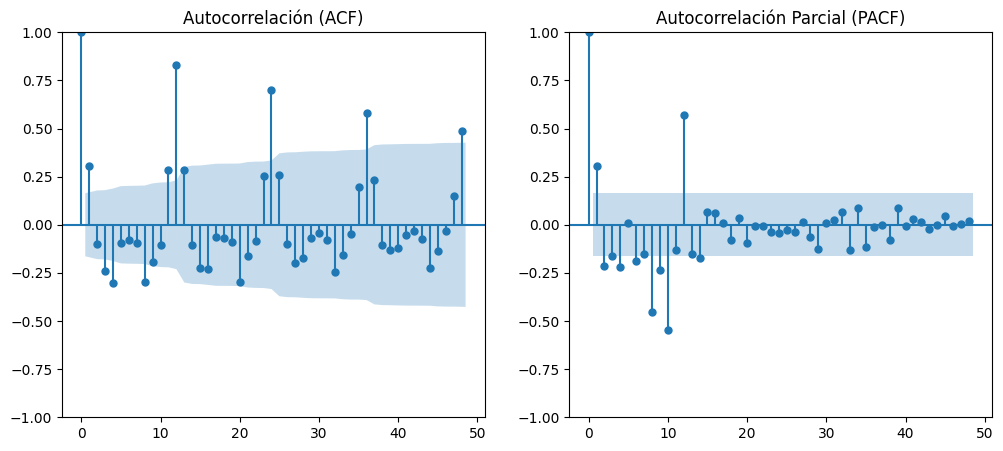

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# ACF para determinar q
plot_acf(ts_diff1, lags=48, ax=ax[0])
ax[0].set_title("Autocorrelación (ACF)")

# PACF para determinar p
plot_pacf(ts_diff1, lags=48, ax=ax[1])
ax[1].set_title("Autocorrelación Parcial (PACF)")

plt.show()

In [41]:
p = 1
d = 1
q = 1

modelo_arima = ARIMA(ts, order=(p,d,q))

resultado_arima = modelo_arima.fit()

In [42]:
# Pronóstico para los próximos 12 meses
predicciones = resultado_arima.predict(start=len(ts), end=len(ts)+11)
predicciones

,predicted_mean
1961-01-01,475.735059
1961-02-01,454.996073
1961-03-01,464.830415
1961-04-01,460.167010
1961-05-01,462.378378
1961-06-01,461.329756
1961-07-01,461.827008
1961-08-01,461.591213
1961-09-01,461.703026
1961-10-01,461.650005


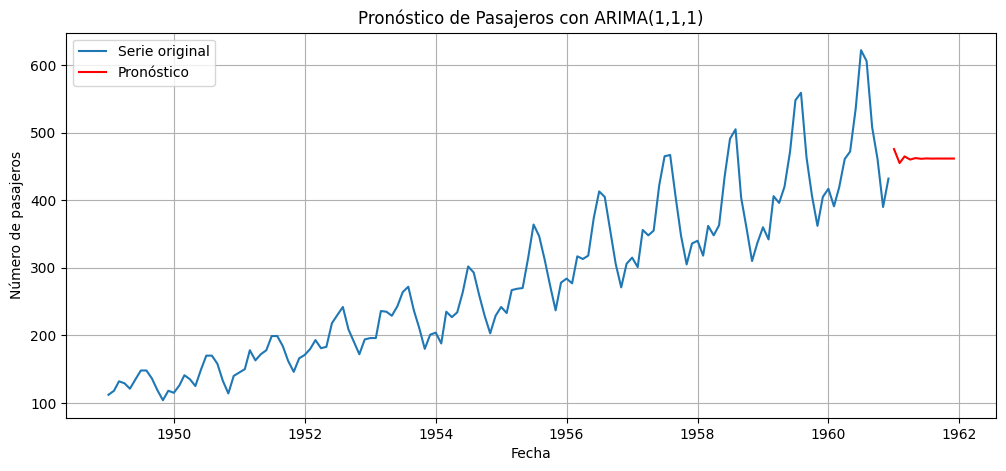

In [43]:
# Graficar pronóstico
plt.figure(figsize=(12,5))
plt.plot(ts, label='Serie original')
plt.plot(predicciones, label='Pronóstico', color='red')
plt.title("Pronóstico de Pasajeros con ARIMA(1,1,1)")
plt.xlabel("Fecha")
plt.ylabel("Número de pasajeros")
plt.legend()
plt.grid(True)
plt.show()

Perdimos la estacionalidad anual....

### Entrenamiento automático del modelo

Existen herramientas que nos facilitan la vida estimando de forma interna los hiperparámetros más apropiados y generando el mejor modelo posible, como el paquete `pmdarima` y su función `auto_arima`.

Lo único que tenemos que considerar es que para optimizar al máximo sus resultados, debemos transformar la serie en estacionaria.

In [44]:
model = auto_arima(ts_diff1, seasonal = True, trace = True, m = 12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=6.63 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1033.479, Time=0.11 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1022.316, Time=0.97 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1022.905, Time=1.12 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1031.508, Time=0.09 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1022.343, Time=0.25 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1021.137, Time=2.15 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=6.05 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=1022.411, Time=0.74 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=1034.068, Time=0.69 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=1023.008, Time=1.24 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=1022.906, Time=1.30 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=1021.017, Time=0.72 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=1022.315, Time=0.26 sec
 ARIMA(0,0,1)(2,1,1)[12] inte

Como podemos ver, la función hace una búsqueda en el espacio de soluciones posible para estimar los mejores parámetros. En este caso tendríamos un $ARIMA(0, 0, 1)$. El modelo que devuelve esta función es totalmente usable, como cualquier otro que hayamos visto, y su función `summary()` devuelve información estadística y sobre su rendimiento que tiene gran valor:

#### Predicción del modelo

Una vez se ha entrenado el modelo, se puede utilizar para predecir a futuro (predeciremos los siguientes `12` meses)

In [45]:
forecast = model.predict(12)
forecast

,0
1961-01-01,19.346932
1961-02-01,-24.244912
1961-03-01,36.280007
1961-04-01,36.323602
1961-05-01,14.329657
1961-06-01,57.816446
1961-07-01,89.458676
1961-08-01,-13.228999
1961-09-01,-96.797005
1961-10-01,-50.216336


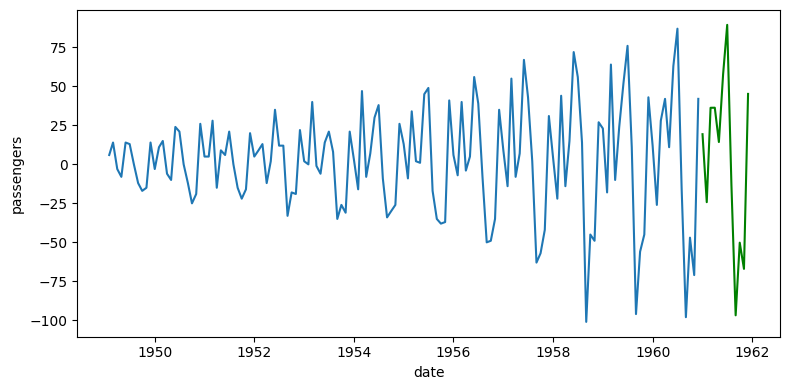

In [46]:
fig, axis = plt.subplots(figsize = (8, 4))

sns.lineplot(data = ts_diff1)
sns.lineplot(data = forecast, c = "green")

plt.tight_layout()

plt.show()

Ahora nuestro modelo es capaz de realizar predicciones a futuro sobre nuestra serie estacionaria.

### Revertimos la diferenciación para mostrar en original

In [47]:
# Último valor de la serie original antes de diferenciar
last_value = ts.iloc[-1]

# Reconstruir las predicciones a partir del último valor conocido
forecast_original_scale = forecast.cumsum() + last_value

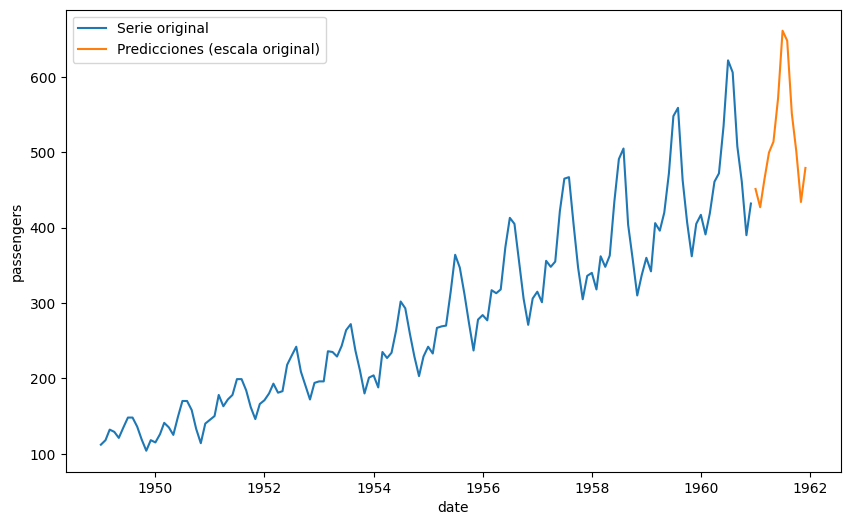

In [48]:
plt.figure(figsize=(10, 6))

# Serie original
sns.lineplot(data=ts, label="Serie original")

# Predicciones en la escala original
sns.lineplot(data=forecast_original_scale, label="Predicciones (escala original)")

plt.legend()
plt.show()

## 5. Links de interés <a name="links"></a>

- [Time Series Forecasting with Python 7-Day Mini-Course](https://machinelearningmastery.com/time-series-forecasting-python/)
- [Time Series analysis](https://www.statsmodels.org/stable/tsa.html)
- [Análisis de series temporales](https://www.ucm.es/data/cont/docs/518-2013-11-11-JAM-IAST-Libro.pdf)